                        **Data Exploration / Linear Regression and k Nearest Neighbor**
1)  Write code to count the number of examples per class.  Is this a balanced or unbalanced dataset? 

In [3]:
# Sami Eskirjeh, 

import numpy as np
import pandas as pd

# Navigation link to find raw text of dataset
url = 'https://raw.githubusercontent.com/SamiESK/IrisData/master/IrisData'
dataset = pd.read_csv(url, header = None)

# Initialise counters to 0
IrisSetosa = 0
IrisVersicolour = 0
IrisVirginica = 0

# iloc method to indicate where to start looking while there is no header to read
x = dataset.iloc[:,4]

# for loops to find character that match desired results
for i in x:
  if i =='Iris-setosa':
    IrisSetosa += 1 # increment counter by one

# print value of classes
print("Number of Iris Setosa examples is",IrisSetosa)

for i in x:
  if i =='Iris-versicolor':
    IrisVersicolour += 1

print("Number of Iris Versicolour examples is",IrisVersicolour)

for i in x:
  if i =='Iris-virginica':
    IrisVirginica += 1

print("Number of Iris Virginica examples is", IrisVirginica)

Number of Iris Setosa examples is 50
Number of Iris Versicolour examples is 50
Number of Iris Virginica examples is 50


Answer 1) Yes the data set is balanced since each class has equal amounts of examples we can work with. Each class has a weight of 50.

2)  This dataset has four attributes: sepal_length, sepal_width, petal_length, and petal_width.  Write code to calculate the minimum and maximum values for each attribute.

In [4]:
sepal_length = dataset.iloc[:, 0:1]
sepal_width = dataset.iloc[:, 1:2]
petal_length = dataset.iloc[:, 2:3]
petal_width = dataset.iloc[:, 3:4]

sepal_lengthMin = sepal_length.min()
print('Min of first attribute is', sepal_lengthMin.min())

sepal_lengthMax = sepal_length.max()
print('Max of first attribute is', sepal_lengthMax.max())
print()

sepal_widthMin = sepal_width.min()
print('Min of second attribute is', sepal_widthMin.min())

sepal_widthMax = sepal_width.max()
print('Max of second attribute is', sepal_widthMax.max())
print()

petal_lengthMin = petal_length.min()
print('Min of third attribute is', petal_lengthMin.min())

petal_lengthMax = petal_length.max()
print('Max of third attribute is', petal_lengthMax.max())
print()

petal_widthMin = petal_width.min()
print('Min of fourth attribute is', petal_widthMin.min())

petal_widthMax = petal_width.max()
print('Max of fourth attribute is', petal_widthMax.max())

Min of first attribute is 4.3
Max of first attribute is 7.9

Min of second attribute is 2.0
Max of second attribute is 4.4

Min of third attribute is 1.0
Max of third attribute is 6.9

Min of fourth attribute is 0.1
Max of fourth attribute is 2.5


3) Plot a scatterplot of the sepal_length (x) vs. the sepal_width (y). Plot a scatterplot of the the petal_length (x) vs. the petal_width (y).

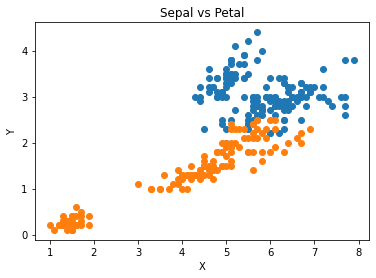

In [6]:
import matplotlib.pyplot as plt

plt.title('Sepal vs Petal')
plt.xlabel('X')
plt.ylabel('Y')

plt.scatter(sepal_length, sepal_width)
plt.scatter(petal_length, petal_width)

4) Use sklearn.linear_model.LinearRegression (Links to an external site.) to learn 2 models of the relationships between sepal_length and  sepal_width and petal_length to petal_width.  Score both models to calculate R^2 (coefficient of determination).  Provide the R^2 score for both models.  Which linear regression model is the better fit?

In [7]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(sepal_length, sepal_width)
reg.score(sepal_length, sepal_width)
print(reg.score(sepal_length, sepal_width))

reg1 = LinearRegression().fit(petal_length, petal_width)
reg1.score(petal_length, petal_width)
print(reg1.score(petal_length, petal_width))

0.0119616328347677
0.9269012279220037


Answer 4) reg1 or the petal regression has a better model to fit since it scores a better percantage.

              **k Nearest Neighbor**

5) Program a k-Nearest Neighbor classifier that uses the Euclidean distance metric to classify this dataset.

In [9]:
from scipy.spatial import distance

## knn method 
def knn(dataset, k, query):
## set each index to a certain column for euclidian distance
  index1 = dataset.iloc[:,0]  
  index2 = dataset.iloc[:,1]
  index3 = dataset.iloc[:,2]
  index4 = dataset.iloc[:,3]
## classes set to column index 4 for classification comparisons used in voter function
  classes = dataset.iloc[:,4]
  clas = ["Iris-setosa", "Iris-versicolour", "Iris-virginica"] 
  dis = np.arange(300, dtype=float).reshape(150,2)
  
  for i in range(150):
## give 'p' the given index of index1 to index4 for column comparisons
    p = [index1[i], index2[i], index3[i], index4[i]]
## find the distance between the points and the query 
    dis[i][0] = distance.euclidean(p, query) 

    if classes[i] == clas[0]:
      dis[i,1] = 0
    elif classes[i] == clas[1]: 
      dis[i,1] = 1
    elif classes[i] == clas[2]:
      dis[i,1] == 2

  dis = dis[dis[:,0].argsort()] 

## if an index matches the following indexes at clas[], then increment counter to 0, 1 or 2 to identify what class it is.
  voter = np.zeros(3)
  for i in range(k):
    if dis[i][1] == 0:
      voter[0] += 1
    elif dis[i][1] == 1:
      voter[1] += 1
    elif dis[i][2] == 2:
      voter[2] += 1

In [25]:
import pandas as pd
import numpy as np

url1 = 'https://raw.githubusercontent.com/SamiESK/Randomset/master/iris.csv'
dataset1 = pd.read_csv(url1, header = None)
clas = ["Iris-setosa", "Iris-versicolour", "Iris-virginica"]
dataset1 = dataset1.iloc[:,:]

def fiveFold(k, data):
  split = 5
  fold = np.array_split(dataset1, split)
  q = fold[0].to_numpy()
  q1 = fold[1].to_numpy()
  q2 = fold[2].to_numpy()
  q3 = fold[3].to_numpy()
  q4 = fold[4].to_numpy()
  res = np.zeros(split)
  test = np.arange(30 * 5, dtype=float).reshape(30 , split)
  train = np.arange(120 * 5, dtype=float).reshape(120 , split)

  for i in range(5):
    if i == 0:
      test = q
      train = np.concatenate((q1, q2, q3, q4))
    elif  i == 1:
      test = q1
      train = np.concatenate((q, q2, q3, q4))
    elif  i == 2:
      test = q2
      train = np.concatenate((q, q1, q3, q4))
    elif  i == 3:
      test = q3
      train = np.concatenate((q, q1, q2, q4))
    elif  i == 4:
      test = q4
      train = np.concatenate((q, q1, q2, q3))
      
    for j in range(30):
      query = [train[j][0], train[j][1], train[j][2], train[j][3]]
      getValues = knn(train, k, query)
      if getValues == 0 and train[j][4] == clas[0]:
        res[i] += 1
      elif getValues == 1 and train[j][4] == clas[1]:
        res[i] += 1
      elif getValues == 2 and train[j][4] == clas[2]:
        res[i] += 1

  for i in range(len(res)):
    res[i] = round(res[i] / 30 * 100, 2)
    return res

In [ ]:
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler

k1 = fiveFold(1, dataset1)
k3 = fiveFold(3, dataset1)
k5 = fiveFold(5, dataset1)
k7 = fiveFold(7, dataset1)
label = ['1', '2', '3', '4', '5', 'Average']
mean = [np.mean(k1), np.mean(k3), np.mean(k5), np.mean(k7)]
k1 = np.append(k1, mean[0])
k3 = np.append(k3, mean[1])
k5 = np.append(k5, mean[2])
k7 = np.append(k7, mean[3])
fig = go.Figure(data=[go.Table(header = dict(values = ['Trial', 'k=1','k=3','k=5','k=7']), cells=dict(values = [label,k1,k3,k5,k7]))])
fig.show()